# **Hybrid Model - Polynomial Regression and ARIMA**

Combine both the **Polynomial Regression** and **ARIMA** models into a hybrid prediction system.
### Steps:
1. **Train Polynomial Regression**.
2. **Train ARIMA Model**.
3. **Predict future values** with both models.
4. **Combine the predictions** of both models.



1. **Combination of Polynomial Regression and ARIMA:**
   - The model combines **Polynomial Regression** (for capturing long-term trends) and **ARIMA** (for handling short-term fluctuations) to create a more accurate crime prediction.
   
2. **Polynomial Regression:**
   - Polynomial regression fits the historical data with a curve, capturing underlying trends over a period of time.
   
3. **ARIMA:**
   - ARIMA (Auto-Regressive Integrated Moving Average) helps model the time series data's seasonality and trends, predicting future values based on historical data.

5. **Hybrid Prediction:**
   - The **Hybrid Model** averages the results from both Polynomial and ARIMA models to make more realistic predictions, combining the strengths of both models.

6. **Improved Accuracy:**
   - This hybrid approach provides more reliable future crime predictions, accounting for both macro and micro-level patterns in the data.

The **Hybrid Model** offers a better prediction over a simple approach by combining both trend analysis and time series forecasting, making it ideal for scenarios like crime prediction where both trends and fluctuations matter.

In [13]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load dataset
url = 'https://raw.githubusercontent.com/SiddardhaShayini/Cyber-Crime-Analysis-and-Prediction-in-India/refs/heads/main/datasets/processed_dataset.csv'
df = pd.read_csv(url)

# Exclude total rows
exclude_states = ['TOTAL (STATES)', 'TOTAL (UTS)']
df = df[~df['State/UT'].isin(exclude_states)]

# Let user choose state
states = df['State/UT'].unique()
print("Select a state/UT by number:")
for idx, state in enumerate(states):
    print(f"{idx+1}. {state}")

state_choice = int(input("\nEnter the number of your chosen state: ")) - 1
chosen_state = states[state_choice]

# Get future year
future_year = int(input("Enter future year to predict up to (e.g. 2026): "))

# Prepare data
state_df = df[df['State/UT'] == chosen_state]
years = list(map(int, [str(y) for y in range(2002, 2022)]))
cases = state_df.iloc[0][[str(y) for y in years]].values.astype(float)

# Use last N years for training
N = 7
train_years = np.array(years[-N:]).reshape(-1, 1)
train_cases = np.array(cases[-N:])

# Polynomial regression (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(train_years)
poly_model = LinearRegression()
poly_model.fit(X_poly, train_cases)

# Predict future using Polynomial regression
predict_years = list(range(2022, future_year + 1))
X_future_poly = poly.transform(np.array(predict_years).reshape(-1, 1))
predict_cases_poly = poly_model.predict(X_future_poly)

# ARIMA Model - Apply ARIMA to the last N years of data
arima_model = ARIMA(train_cases, order=(1, 1, 1))  # ARIMA(1, 1, 1) model
arima_model_fit = arima_model.fit()

# Predict future using ARIMA
arima_predict_cases = arima_model_fit.forecast(steps=future_year - 2021)

# Add realistic fluctuation (simulate external influence) for both predictions
np.random.seed(42)  # for reproducibility
fluctuation_poly = np.random.normal(loc=0.0, scale=0.07, size=len(predict_cases_poly))  # ~7% noise for poly
fluctuation_arima = np.random.normal(loc=0.0, scale=0.07, size=len(arima_predict_cases))  # ~7% noise for ARIMA
predict_cases_poly = predict_cases_poly * (1 + fluctuation_poly)
arima_predict_cases = arima_predict_cases * (1 + fluctuation_arima)

# Ensure no negative values
predict_cases_poly = np.clip(predict_cases_poly, a_min=0, a_max=None)
arima_predict_cases = np.clip(arima_predict_cases, a_min=0, a_max=None)

# Combine predictions from Polynomial and ARIMA (Hybrid Model)
hybrid_predict_cases = (predict_cases_poly + arima_predict_cases) / 2  # Simple average of both models

# Combine historical data with predictions from Hybrid Model
all_years = years + predict_years
all_cases_hybrid = list(cases) + list(hybrid_predict_cases)

# Plot only Hybrid Model predictions
fig = go.Figure()

# Plot historical data (Actual)
fig.add_trace(go.Scatter(x=years, y=cases, mode='lines+markers', name='Actual', line=dict(color='skyblue')))

# Plot predicted data from Hybrid Model (Prediction)
fig.add_trace(go.Scatter(x=predict_years, y=hybrid_predict_cases, mode='lines+markers', name='Predicted (Hybrid)', line=dict(color='red', dash='solid')))

fig.update_layout(
    title=f"Crime Prediction for {chosen_state} (Hybrid Model)",
    xaxis_title="Year",
    yaxis_title="Cases Reported",
    template="plotly_dark"
)

fig.show()


Select a state/UT by number:
1. ANDHRA PRADESH
2. ARUNANCHAL PRADESH
3. ASSAM
4. BIHAR
5. CHHATTISGARH
6. GOA
7. GUJARAT
8. HARYANA
9. HIMACHAL PRADESH
10. JAMMU & KASHMIR
11. JHARKHAND
12. KARNATAKA
13. KERALA
14. MADHYA PRADESH
15. MAHARASHTRA
16. MANIPUR
17. MEGHALAYA
18. MIZORAM
19. NAGALAND
20. ODISHA
21. PUNJAB
22. RAJASTHAN
23. SIKKIM
24. TAMIL NADU
25. TELANGANA
26. TRIPURA
27. UTTAR PRADESH
28. UTTARAKHAND
29. WEST BENGAL
30. ANDAMAN & NICOBAR ISLAND
31. CHANDIGARH
32. DADARA & NAGAR HAVELLI
33. DAMAN & DIU
34. NCT OF DELHI
35. LAKSHADWEEP
36. PUDUCHERRY
37. TOTAL (ALL INDIA)

Enter the number of your chosen state: 24
Enter future year to predict up to (e.g. 2026): 2026


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [14]:
import pandas as pd
import numpy as np
import joblib  # for saving models
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load dataset
url = 'https://raw.githubusercontent.com/SiddardhaShayini/Cyber-Crime-Analysis-and-Prediction-in-India/refs/heads/main/datasets/processed_dataset.csv'
df = pd.read_csv(url)

# Exclude total rows
exclude_states = ['TOTAL (STATES)', 'TOTAL (UTS)']
df = df[~df['State/UT'].isin(exclude_states)]

# Prepare data
states = df['State/UT'].unique()
years = list(map(int, [str(y) for y in range(2002, 2022)]))

# Train with all states - We will concatenate data for each state
train_years = np.array(years[-7:]).reshape(-1, 1)  # Last 7 years for training
all_cases = []

# Store training data for each state
for state in states:
    state_df = df[df['State/UT'] == state]
    cases = state_df.iloc[0][[str(y) for y in years]].values.astype(float)
    all_cases.append(cases[-7:])

all_cases = np.array(all_cases)

# Now, fit the model for each state separately (Polynomial regression)
poly = PolynomialFeatures(degree=3)
arima_models = []
poly_models = []

# Loop through each state's cases
for i in range(len(states)):
    state_cases = all_cases[i]
    X_poly = poly.fit_transform(train_years)  # Polynomial features for years
    poly_model = LinearRegression()
    poly_model.fit(X_poly, state_cases)
    poly_models.append(poly_model)

    # ARIMA Model - Apply ARIMA to the last 7 years of data for each state
    arima_model = ARIMA(state_cases, order=(1, 1, 1))  # ARIMA(1, 1, 1) model
    arima_model_fit = arima_model.fit()
    arima_models.append(arima_model_fit)

# Save the trained models
joblib.dump(arima_models, '/content/arima_models.pkl')  # Save ARIMA models
joblib.dump(poly_models, '/content/poly_models.pkl')  # Save Polynomial Regression models

# Provide download links for the models
from google.colab import files
files.download('/content/arima_models.pkl')  # Download ARIMA models
files.download('/content/poly_models.pkl')  # Download Polynomial models

print("Models have been saved and are ready for download.")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: Convergenc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Models have been saved and are ready for download.


In [3]:
from google.colab import files

# Upload the model files
uploaded = files.upload()


Saving arima_models.pkl to arima_models (1).pkl
Saving poly_models.pkl to poly_models (1).pkl


In [15]:
import joblib

# Load the models from the uploaded files
arima_models = joblib.load('/content/arima_models.pkl')
poly_models = joblib.load('/content/poly_models.pkl')


In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select a state for evaluation
state_idx = 0  # You can change index for other states

# Historical years and future years
historical_years = np.array(years[-7:])  # 2015 to 2021
future_years = np.array([2022, 2023, 2024])

# Actual cases for the state (last 7 years)
state_cases = all_cases[state_idx]  # Shape: (7,)

# Get models
poly_model = poly_models[state_idx]
arima_model = arima_models[state_idx]

# Polynomial Regression Predictions (on training years)
X_poly_hist = poly.transform(historical_years.reshape(-1, 1))
poly_pred_hist = poly_model.predict(X_poly_hist)

# ARIMA Predictions (on training data, use in-sample prediction)
arima_pred_hist = arima_model.predict(start=0, end=6)  # Predict for all 7 training points

# Evaluate on Training Data
print("📊 Evaluation on Training Data (2015-2021):\n")

print("Polynomial Regression:")
print("MAE:", mean_absolute_error(state_cases, poly_pred_hist))
print("RMSE:", np.sqrt(mean_squared_error(state_cases, poly_pred_hist)))
print("R²:", r2_score(state_cases, poly_pred_hist))

print("\nARIMA:")
print("MAE:", mean_absolute_error(state_cases, arima_pred_hist))
print("RMSE:", np.sqrt(mean_squared_error(state_cases, arima_pred_hist)))
print("R²:", r2_score(state_cases, arima_pred_hist))

# Hybrid prediction on training years
hybrid_hist = (poly_pred_hist + arima_pred_hist) / 2

print("\nHybrid Model:")
print("MAE:", mean_absolute_error(state_cases, hybrid_hist))
print("RMSE:", np.sqrt(mean_squared_error(state_cases, hybrid_hist)))
print("R²:", r2_score(state_cases, hybrid_hist))

# =====================
# Forecasting Future Years
# =====================
X_poly_future = poly.transform(future_years.reshape(-1, 1))
poly_future_pred = poly_model.predict(X_poly_future)
arima_future_pred = arima_model.forecast(steps=3)
hybrid_future_pred = (poly_future_pred + arima_future_pred) / 2



📊 Evaluation on Training Data (2015-2021):

Polynomial Regression:
MAE: 59.430005754743306
RMSE: 79.38055812345986
R²: 0.980184406475585

ARIMA:
MAE: 277.82208555775634
RMSE: 331.8219976770882
R²: 0.6537505150899072

Hybrid Model:
MAE: 147.2690292290735
RMSE: 186.77633398358918
R²: 0.8902959950500473


### Analyze cyber crime for a particular state (year-wise trend)

Available States:

0: ANDHRA PRADESH
1: ARUNANCHAL PRADESH
2: ASSAM
3: BIHAR
4: CHHATTISGARH
5: GOA
6: GUJARAT
7: HARYANA
8: HIMACHAL PRADESH
9: JAMMU & KASHMIR
10: JHARKHAND
11: KARNATAKA
12: KERALA
13: MADHYA PRADESH
14: MAHARASHTRA
15: MANIPUR
16: MEGHALAYA
17: MIZORAM
18: NAGALAND
19: ODISHA
20: PUNJAB
21: RAJASTHAN
22: SIKKIM
23: TAMIL NADU
24: TELANGANA
25: TRIPURA
26: UTTAR PRADESH
27: UTTARAKHAND
28: WEST BENGAL
29: ANDAMAN & NICOBAR ISLAND
30: CHANDIGARH
31: DADARA & NAGAR HAVELLI
32: DAMAN & DIU
33: NCT OF DELHI
34: LAKSHADWEEP
35: PUDUCHERRY
36: TOTAL (ALL INDIA)

Enter the index number of the state: 24

You selected: TELANGANA


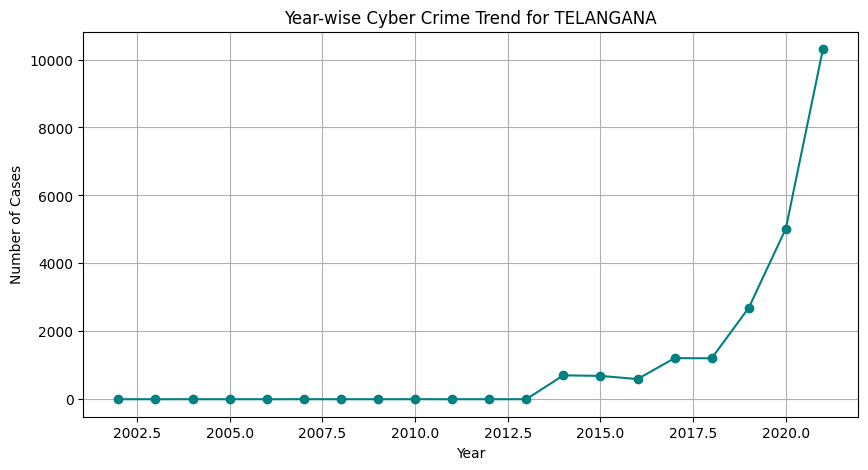

In [18]:
import matplotlib.pyplot as plt

# Show available states with index
print("Available States:\n")
for idx, state in enumerate(states):
    print(f"{idx}: {state}")

# Ask for user input
state_idx = int(input("\nEnter the index number of the state: "))
state_name = states[state_idx]
print(f"\nYou selected: {state_name}")

# Extract data
state_df = df[df['State/UT'] == state_name]
cases = state_df.iloc[0][[str(y) for y in years]].values.astype(float)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(years, cases, marker='o', color='teal')
plt.title(f'Year-wise Cyber Crime Trend for {state_name}')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()


### Analyze cyber crime for a particular year (all states)

Enter year between 2002 and 2021: 2018


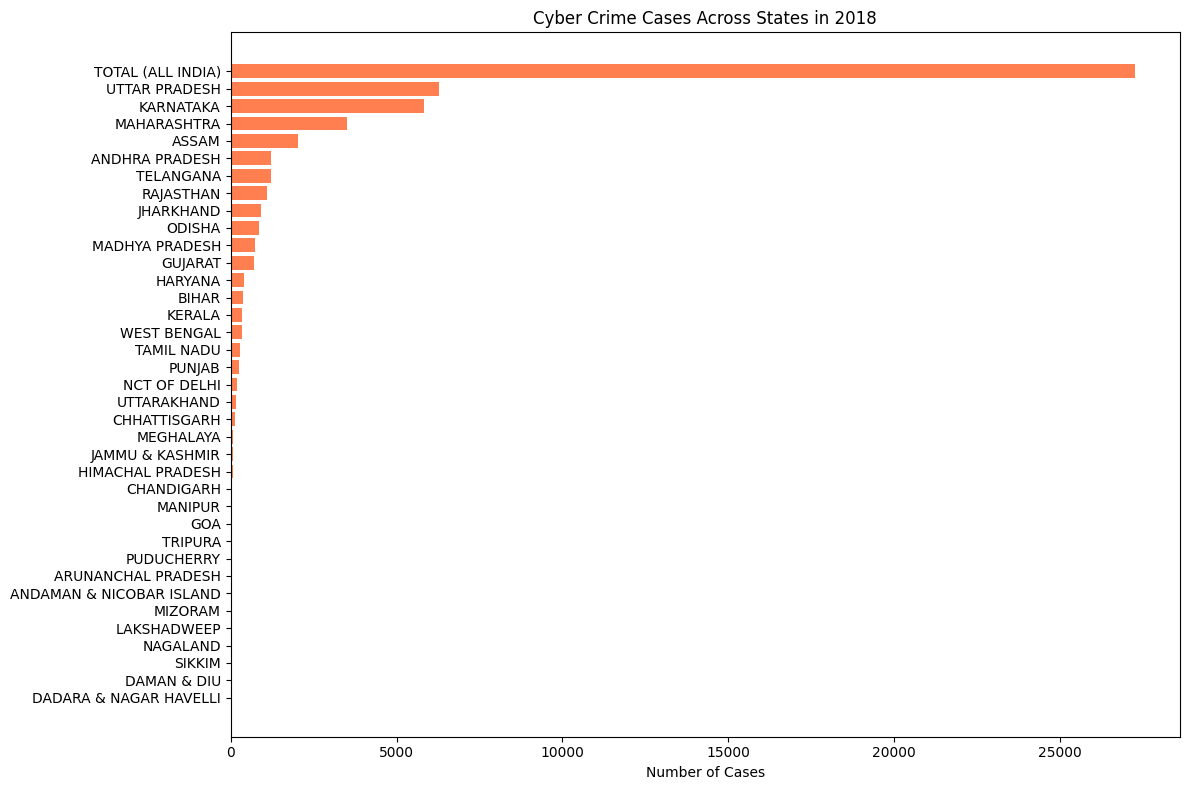

In [19]:
# Ask user for year
year = int(input("Enter year between 2002 and 2021: "))
assert 2002 <= year <= 2021, "Year out of range"

# Extract data for the year
cases_year = df[[str(year), 'State/UT']]
cases_year = cases_year.sort_values(by=str(year), ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(cases_year['State/UT'], cases_year[str(year)], color='coral')
plt.title(f'Cyber Crime Cases Across States in {year}')
plt.xlabel('Number of Cases')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Forecast from start year to end year for a particular state

Available States:

0: ANDHRA PRADESH
1: ARUNANCHAL PRADESH
2: ASSAM
3: BIHAR
4: CHHATTISGARH
5: GOA
6: GUJARAT
7: HARYANA
8: HIMACHAL PRADESH
9: JAMMU & KASHMIR
10: JHARKHAND
11: KARNATAKA
12: KERALA
13: MADHYA PRADESH
14: MAHARASHTRA
15: MANIPUR
16: MEGHALAYA
17: MIZORAM
18: NAGALAND
19: ODISHA
20: PUNJAB
21: RAJASTHAN
22: SIKKIM
23: TAMIL NADU
24: TELANGANA
25: TRIPURA
26: UTTAR PRADESH
27: UTTARAKHAND
28: WEST BENGAL
29: ANDAMAN & NICOBAR ISLAND
30: CHANDIGARH
31: DADARA & NAGAR HAVELLI
32: DAMAN & DIU
33: NCT OF DELHI
34: LAKSHADWEEP
35: PUDUCHERRY

Enter the index number of the state: 24

You selected: TELANGANA
Enter forecast start year (>=2022): 2025
Enter forecast end year (>start year): 2026


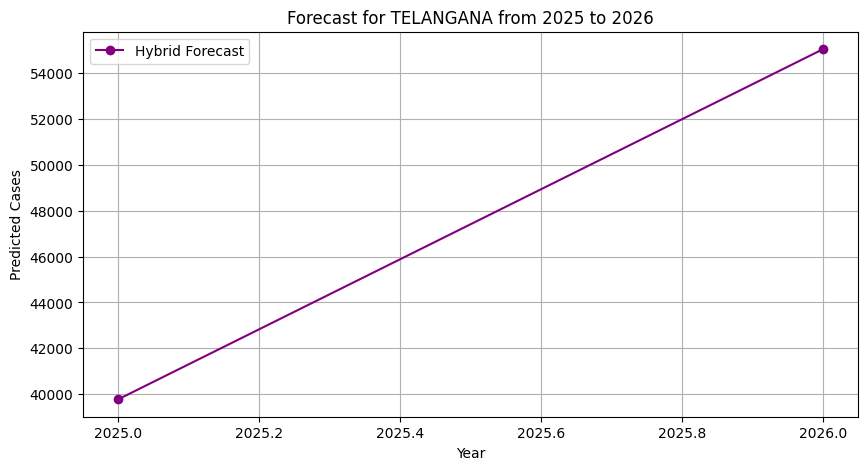

In [37]:
# Show states
print("Available States:\n")
for idx, state in enumerate(states[:-1]):
    print(f"{idx}: {state}")
state_idx = int(input("\nEnter the index number of the state: "))
state_name = states[state_idx]
print(f"\nYou selected: {state_name}")

# Input years
start_year = int(input("Enter forecast start year (>=2022): "))
end_year = int(input("Enter forecast end year (>start year): "))
n_years = end_year - start_year + 1
future_years = np.arange(start_year, end_year + 1).reshape(-1, 1)

# Hybrid forecast
X_poly_future = poly.fit_transform(future_years)
poly_pred = poly_models[state_idx].predict(X_poly_future)
arima_pred = arima_models[state_idx].forecast(steps=n_years)
hybrid_pred = (poly_pred + arima_pred) / 2

# Plot
plt.figure(figsize=(10, 5))
plt.plot(future_years, hybrid_pred, marker='o', color='purple', label='Hybrid Forecast')
plt.title(f'Forecast for {state_name} from {start_year} to {end_year}')
plt.xlabel('Year')
plt.ylabel('Predicted Cases')
plt.grid(True)
plt.legend()
plt.show()


### Forecast for a specific state and specific year

Available States:

0: ANDHRA PRADESH
1: ARUNANCHAL PRADESH
2: ASSAM
3: BIHAR
4: CHHATTISGARH
5: GOA
6: GUJARAT
7: HARYANA
8: HIMACHAL PRADESH
9: JAMMU & KASHMIR
10: JHARKHAND
11: KARNATAKA
12: KERALA
13: MADHYA PRADESH
14: MAHARASHTRA
15: MANIPUR
16: MEGHALAYA
17: MIZORAM
18: NAGALAND
19: ODISHA
20: PUNJAB
21: RAJASTHAN
22: SIKKIM
23: TAMIL NADU
24: TELANGANA
25: TRIPURA
26: UTTAR PRADESH
27: UTTARAKHAND
28: WEST BENGAL
29: ANDAMAN & NICOBAR ISLAND
30: CHANDIGARH
31: DADARA & NAGAR HAVELLI
32: DAMAN & DIU
33: NCT OF DELHI
34: LAKSHADWEEP
35: PUDUCHERRY

Enter the index number of the state: 24

You selected: TELANGANA
Enter forecast year (>=2022): 2025

Predicted cyber crime cases in TELANGANA for 2025: 48203


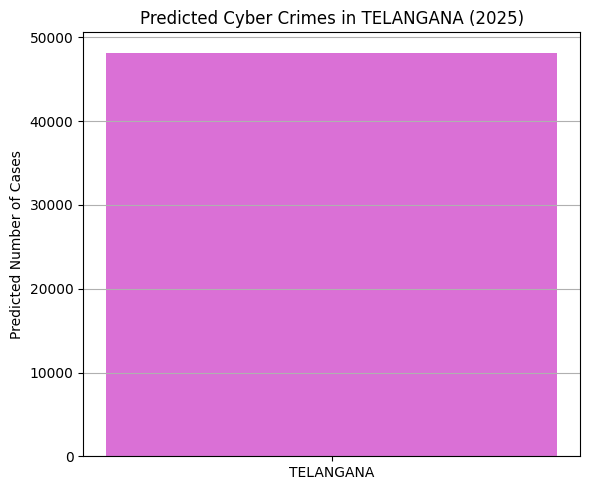

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Show states
print("Available States:\n")
for idx, state in enumerate(states[:-1]):
    print(f"{idx}: {state}")
state_idx = int(input("\nEnter the index number of the state: "))
state_name = states[state_idx]
print(f"\nYou selected: {state_name}")

# Input forecast year
year = int(input("Enter forecast year (>=2022): "))
years_ahead = year - 2021

# Forecast
X_poly = poly.fit_transform(np.array([[year]]))
poly_pred = poly_models[state_idx].predict(X_poly)
arima_pred = arima_models[state_idx].forecast(steps=years_ahead)[-1]
hybrid_pred = (poly_pred[0] + arima_pred) / 2

# Display result
predicted_value = round(hybrid_pred)
print(f"\nPredicted cyber crime cases in {state_name} for {year}: {predicted_value}")

# Plot the result
plt.figure(figsize=(6, 5))
plt.bar([state_name], [predicted_value], color='orchid')
plt.title(f'Predicted Cyber Crimes in {state_name} ({year})')
plt.ylabel('Predicted Number of Cases')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Forecast for all states in a future year

Enter future year (>=2022): 2026


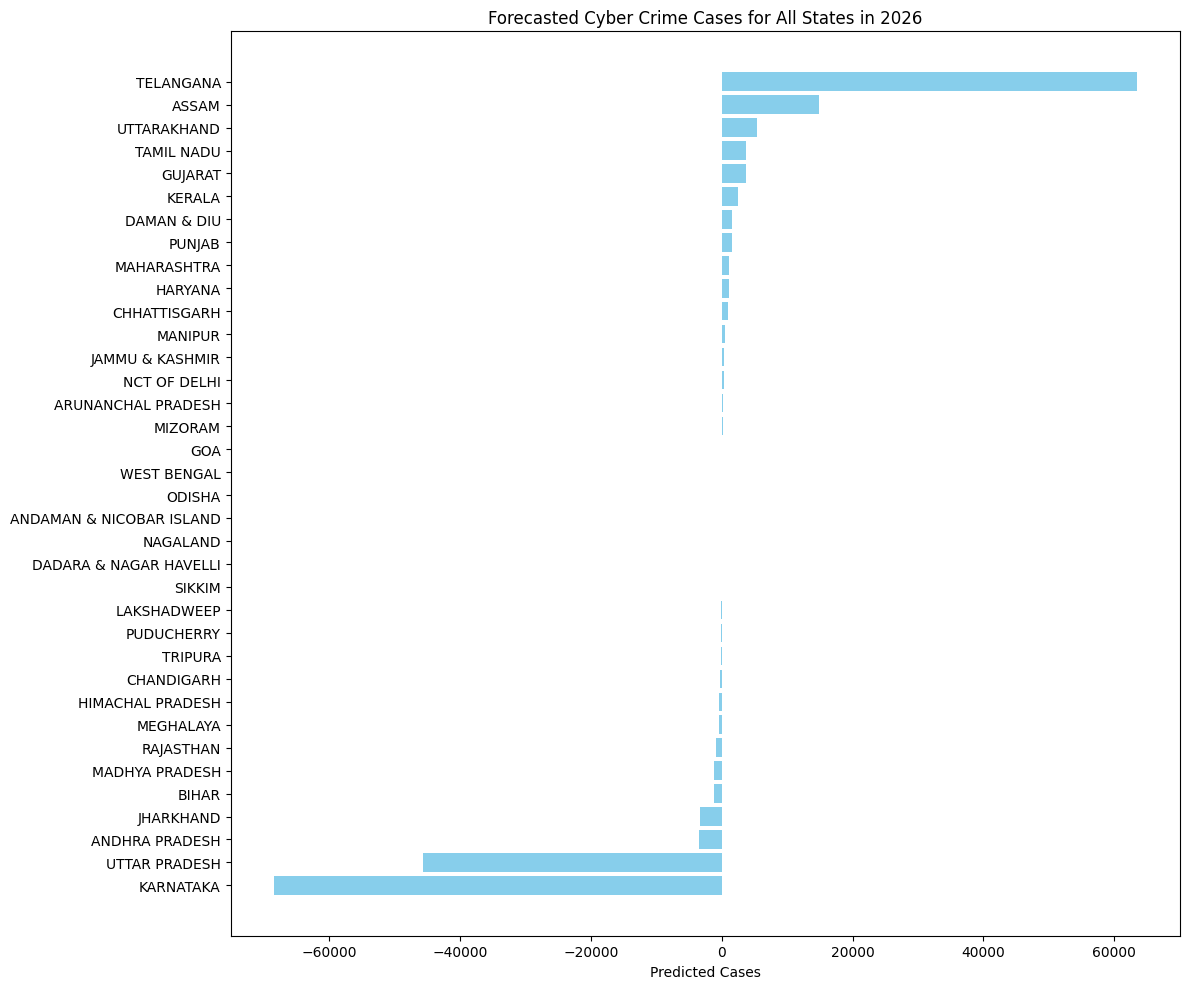

In [45]:
year = int(input("Enter future year (>=2022): "))
years_ahead = year - 2021

forecast_results = {}
for idx, state in enumerate(states):
    if state == "TOTAL (ALL INDIA)":
        continue  # Skip the total all-India row

    X_poly = poly.fit_transform(np.array([[year]]))
    poly_pred = poly_models[idx].predict(X_poly)
    arima_pred = arima_models[idx].forecast(steps=years_ahead)[-1]
    hybrid_pred = (poly_pred[0] + arima_pred) / 2
    forecast_results[state] = round(hybrid_pred)

# Convert and sort
forecast_df = pd.DataFrame(list(forecast_results.items()), columns=['State/UT', f'Forecast {year}'])
forecast_df = forecast_df.sort_values(by=f'Forecast {year}', ascending=False)

# Plot
plt.figure(figsize=(12, 10))
plt.barh(forecast_df['State/UT'], forecast_df[f'Forecast {year}'], color='skyblue')
plt.title(f'Forecasted Cyber Crime Cases for All States in {year}')
plt.xlabel('Predicted Cases')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Forecast top 5 states with highest expected crimes in a future year

Enter future year (>=2022): 2025


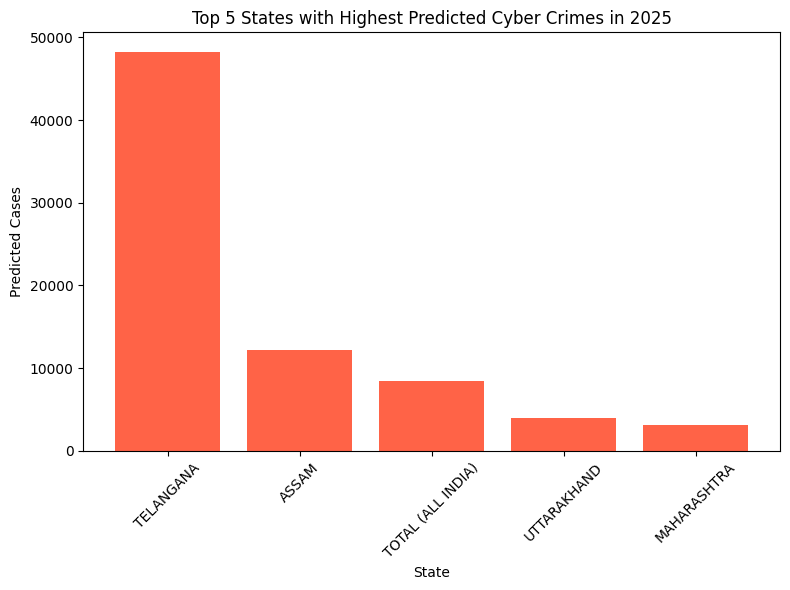

In [28]:
year = int(input("Enter future year (>=2022): "))
years_ahead = year - 2021

forecast_results = {}
for idx, state in enumerate(states):
    X_poly = poly.fit_transform(np.array([[year]]))
    poly_pred = poly_models[idx].predict(X_poly)
    arima_pred = arima_models[idx].forecast(steps=years_ahead)[-1]
    hybrid_pred = (poly_pred[0] + arima_pred) / 2
    forecast_results[state] = round(hybrid_pred)

# Top 5 states
top5_df = pd.DataFrame(list(forecast_results.items()), columns=['State/UT', f'Forecast {year}'])
top5_df = top5_df.sort_values(by=f'Forecast {year}', ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(top5_df['State/UT'], top5_df[f'Forecast {year}'], color='tomato')
plt.title(f'Top 5 States with Highest Predicted Cyber Crimes in {year}')
plt.xlabel('State')
plt.ylabel('Predicted Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd




### Year-wise Trend for a Particular State (Plotly)

In [40]:
# Show available states with index
print("Available States:\n")
for idx, state in enumerate(states):
    print(f"{idx}: {state}")

state_idx = int(input("\nEnter the index number of the state: "))
state_name = states[state_idx]
print(f"\nYou selected: {state_name}")

state_df = df[df['State/UT'] == state_name]
cases = state_df.iloc[0][[str(y) for y in years]].values.astype(float)

fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=cases, mode='lines+markers', name='Reported Cases', line=dict(color='royalblue')))
fig.update_layout(title=f"Year-wise Cyber Crime Trend - {state_name}",
                  xaxis_title="Year", yaxis_title="Number of Cases", template="plotly_dark")
fig.show()


Available States:

0: ANDHRA PRADESH
1: ARUNANCHAL PRADESH
2: ASSAM
3: BIHAR
4: CHHATTISGARH
5: GOA
6: GUJARAT
7: HARYANA
8: HIMACHAL PRADESH
9: JAMMU & KASHMIR
10: JHARKHAND
11: KARNATAKA
12: KERALA
13: MADHYA PRADESH
14: MAHARASHTRA
15: MANIPUR
16: MEGHALAYA
17: MIZORAM
18: NAGALAND
19: ODISHA
20: PUNJAB
21: RAJASTHAN
22: SIKKIM
23: TAMIL NADU
24: TELANGANA
25: TRIPURA
26: UTTAR PRADESH
27: UTTARAKHAND
28: WEST BENGAL
29: ANDAMAN & NICOBAR ISLAND
30: CHANDIGARH
31: DADARA & NAGAR HAVELLI
32: DAMAN & DIU
33: NCT OF DELHI
34: LAKSHADWEEP
35: PUDUCHERRY
36: TOTAL (ALL INDIA)

Enter the index number of the state: 24

You selected: TELANGANA


### Analyze Cyber Crime for a Particular Year (All States)

In [32]:
import plotly.graph_objects as go

year = int(input("Enter year between 2002 and 2021: "))
assert 2002 <= year <= 2021, "Year out of range"

cases_year = df[['State/UT', str(year)]].sort_values(by=str(year), ascending=True)  # ascending for better scroll

fig = go.Figure(go.Bar(
    x=cases_year[str(year)],
    y=cases_year['State/UT'],
    orientation='h',
    marker_color='lightskyblue'
))

fig.update_layout(
    title=f'Cyber Crime in {year} - All States',
    xaxis_title='Reported Cases',
    yaxis_title='State/UT',
    template='plotly_white',
    height=40 * len(cases_year),  # dynamically scale height
    margin=dict(l=150, r=50, t=60, b=40)
)

fig.update_yaxes(autorange="reversed")
fig.show()


Enter year between 2002 and 2021: 2019


### Forecast from Start Year to End Year for a Particular State

In [42]:
print("Available States:\n")
for idx, state in enumerate(states[:-1]):
    print(f"{idx}: {state}")
state_idx = int(input("\nEnter the index number of the state: "))
state_name = states[state_idx]
print(f"\nYou selected: {state_name}")

start_year = int(input("Enter forecast start year (>=2022): "))
end_year = int(input("Enter forecast end year (>start year): "))
n_years = end_year - start_year + 1
future_years = np.arange(start_year, end_year + 1).reshape(-1, 1)

X_poly_future = poly.fit_transform(future_years)
poly_pred = poly_models[state_idx].predict(X_poly_future)
arima_pred = arima_models[state_idx].forecast(steps=n_years)
hybrid_pred = (poly_pred + arima_pred) / 2

fig = go.Figure()
fig.add_trace(go.Scatter(x=future_years.flatten(), y=hybrid_pred, mode='lines+markers',
                         name='Hybrid Forecast', line=dict(color='mediumpurple')))
fig.update_layout(title=f'Forecast ({start_year}-{end_year}) - {state_name}',
                  xaxis_title='Year', yaxis_title='Predicted Cases', template='plotly_dark')
fig.show()


Available States:

0: ANDHRA PRADESH
1: ARUNANCHAL PRADESH
2: ASSAM
3: BIHAR
4: CHHATTISGARH
5: GOA
6: GUJARAT
7: HARYANA
8: HIMACHAL PRADESH
9: JAMMU & KASHMIR
10: JHARKHAND
11: KARNATAKA
12: KERALA
13: MADHYA PRADESH
14: MAHARASHTRA
15: MANIPUR
16: MEGHALAYA
17: MIZORAM
18: NAGALAND
19: ODISHA
20: PUNJAB
21: RAJASTHAN
22: SIKKIM
23: TAMIL NADU
24: TELANGANA
25: TRIPURA
26: UTTAR PRADESH
27: UTTARAKHAND
28: WEST BENGAL
29: ANDAMAN & NICOBAR ISLAND
30: CHANDIGARH
31: DADARA & NAGAR HAVELLI
32: DAMAN & DIU
33: NCT OF DELHI
34: LAKSHADWEEP
35: PUDUCHERRY

Enter the index number of the state: 24

You selected: TELANGANA
Enter forecast start year (>=2022): 2025
Enter forecast end year (>start year): 2026


### Forecast for a Specific State & Specific Year

In [43]:
import numpy as np
import plotly.graph_objects as go

# Show available states with index
print("Available States:\n")
for idx, state in enumerate(states):
    print(f"{idx}: {state}")
state_idx = int(input("\nEnter the index number of the state: "))
state_name = states[state_idx]
print(f"\nYou selected: {state_name}")

# Get forecast year from user
year = int(input("Enter forecast year (>=2022): "))
years_ahead = year - 2021

# Predict using hybrid model
X_poly = poly.fit_transform(np.array([[year]]))
poly_pred = poly_models[state_idx].predict(X_poly)
arima_pred = arima_models[state_idx].forecast(steps=years_ahead)[-1]
hybrid_pred = (poly_pred[0] + arima_pred) / 2

# Bar plot
fig = go.Figure(go.Bar(
    x=[state_name],
    y=[round(hybrid_pred)],
    marker_color='orangered',
    text=[round(hybrid_pred)],
    textposition='outside'
))
fig.update_layout(title=f"Hybrid Forecast for {state_name} in {year}",
                  xaxis_title="State/UT", yaxis_title="Predicted Cyber Crimes",
                  template="plotly_dark", showlegend=False)
fig.show()


Available States:

0: ANDHRA PRADESH
1: ARUNANCHAL PRADESH
2: ASSAM
3: BIHAR
4: CHHATTISGARH
5: GOA
6: GUJARAT
7: HARYANA
8: HIMACHAL PRADESH
9: JAMMU & KASHMIR
10: JHARKHAND
11: KARNATAKA
12: KERALA
13: MADHYA PRADESH
14: MAHARASHTRA
15: MANIPUR
16: MEGHALAYA
17: MIZORAM
18: NAGALAND
19: ODISHA
20: PUNJAB
21: RAJASTHAN
22: SIKKIM
23: TAMIL NADU
24: TELANGANA
25: TRIPURA
26: UTTAR PRADESH
27: UTTARAKHAND
28: WEST BENGAL
29: ANDAMAN & NICOBAR ISLAND
30: CHANDIGARH
31: DADARA & NAGAR HAVELLI
32: DAMAN & DIU
33: NCT OF DELHI
34: LAKSHADWEEP
35: PUDUCHERRY
36: TOTAL (ALL INDIA)

Enter the index number of the state: 36

You selected: TOTAL (ALL INDIA)
Enter forecast year (>=2022): 2025


### Forecast for All States in a Future Year

In [46]:
year = int(input("Enter future year (>=2022): "))
years_ahead = year - 2021
forecast_results = {}

for idx, state in enumerate(states):
    if state == "TOTAL (ALL INDIA)":
        continue  # Skip the total all-India row

    X_poly = poly.fit_transform(np.array([[year]]))
    poly_pred = poly_models[idx].predict(X_poly)
    arima_pred = arima_models[idx].forecast(steps=years_ahead)[-1]
    hybrid_pred = (poly_pred[0] + arima_pred) / 2
    forecast_results[state] = round(hybrid_pred)

# Create dataframe
forecast_df = pd.DataFrame(list(forecast_results.items()), columns=['State/UT', f'Forecast {year}'])
forecast_df = forecast_df.sort_values(by=f'Forecast {year}', ascending=False)

# Calculate dynamic height
bar_height = 30  # px per bar
fig_height = max(400, len(forecast_df) * bar_height)

# Plot
fig = go.Figure(go.Bar(
    x=forecast_df[f'Forecast {year}'],
    y=forecast_df['State/UT'],
    orientation='h',
    marker_color='lightgreen'
))
fig.update_layout(
    title=f"Forecasted Cyber Crimes in {year} (All States)",
    xaxis_title='Predicted Cases',
    yaxis_title='State/UT',
    template='plotly_white',
    height=fig_height  # Set dynamic height
)
fig.update_yaxes(autorange="reversed")
fig.show()


Enter future year (>=2022): 2026


### Forecast Top 5 States with Highest Expected Crimes in a Future Year

In [47]:
year = int(input("Enter future year (>=2022): "))
years_ahead = year - 2021
forecast_results = {}

for idx, state in enumerate(states):
    X_poly = poly.fit_transform(np.array([[year]]))
    poly_pred = poly_models[idx].predict(X_poly)
    arima_pred = arima_models[idx].forecast(steps=years_ahead)[-1]
    hybrid_pred = (poly_pred[0] + arima_pred) / 2
    forecast_results[state] = round(hybrid_pred)

top5_df = pd.DataFrame(list(forecast_results.items()), columns=['State/UT', f'Forecast {year}'])
top5_df = top5_df.sort_values(by=f'Forecast {year}', ascending=False).head(5)

fig = go.Figure(go.Bar(
    x=top5_df['State/UT'],
    y=top5_df[f'Forecast {year}'],
    marker_color='crimson'
))
fig.update_layout(title=f"Top 5 States with Highest Predicted Cyber Crimes in {year}",
                  xaxis_title='State', yaxis_title='Predicted Cases', template='plotly_dark')
fig.show()


Enter future year (>=2022): 2026


### Cyber Crime Forecast for India up to future year.

In [48]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go

state = "TOTAL (ALL INDIA)"
#print(f"\nYou selected: {state}")

# Get forecast year from user
future_year = int(input("Enter forecast year up to (>=2022): "))
years = list(range(2002, 2022))
predict_years = list(range(2022, future_year + 1))

# Get actual data for the selected state
state_df = df[df['State/UT'] == state]
cases = state_df.iloc[0][[str(y) for y in years]].values.astype(float)

# Get models by index (your structure)
poly_model = poly_models[state_idx]
arima_model = arima_models[state_idx]

# Polynomial predictions
X_poly = np.array(predict_years).reshape(-1, 1)
X_poly_transformed = poly.fit_transform(X_poly)
poly_preds = poly_model.predict(X_poly_transformed)

# ARIMA predictions
arima_preds = arima_model.forecast(steps=future_year - 2021)

# Add small fluctuations
np.random.seed(42)
fluctuation_poly = np.random.normal(0.0, 0.07, len(poly_preds))
fluctuation_arima = np.random.normal(0.0, 0.07, len(arima_preds))
poly_preds *= (1 + fluctuation_poly)
arima_preds *= (1 + fluctuation_arima)

# Clip to remove negatives
poly_preds = np.clip(poly_preds, 0, None)
arima_preds = np.clip(arima_preds, 0, None)

# Hybrid average
hybrid_preds = (poly_preds + arima_preds) / 2

# Combine for plot
all_years = years + predict_years
all_cases = list(cases) + list(hybrid_preds)

# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=cases, mode='lines+markers', name='Actual', line=dict(color='skyblue')))
fig.add_trace(go.Scatter(x=predict_years, y=hybrid_preds, mode='lines+markers', name='Predicted (Hybrid)', line=dict(color='orangered')))

fig.update_layout(
    title=f"Hybrid Crime Prediction for {state} up to {future_year}",
    xaxis_title="Year",
    yaxis_title="Predicted Cyber Crimes",
    template="plotly_dark"
)

fig.show()


Enter forecast year up to (>=2022): 2026
